# Data and Sampling Distributions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

## Random Sampling and Sample Bias

- **Sample**: A subset from a larger data set.
- **Population**: The larger data set or idea of a data set.
- **N (n)**: The size of the population (sample).
- **Random sampling**: Drawing elements into a sample at random.
- **Stratified sampling**: Dividing the population into strata and randomly sampling from each strata.
- **Simple random sample**: The sample that results from random sampling without stratifying the population.
- **Sample bias**: A sample that misrepresents the population.

Random sampling involves drawing samples from a population where each sample has equal weight of being drawn. This is called a _simple random sample_. If sampling is done with replacement the drawn sample goes back into the population and so can be drawn again. If the sampling is done without replacement one a sample is drawn it cannot be drawn again.

Sampling bias occurs when the drawn sample is different in some meaningful nonrandom way from the larger population it was meant to represent. For example, if you took a poll of who will win an election but the sample in the poll favours a particular party, your sample is biased towards that party and may not be representative of the population.

There is also a notion of self-selection bias. If you look at reviews for a product of company are view the portraying representative of the population? The users who are leaving reviews are not randomly selected, rather, they themselves have take the initative to write. This is self-selection bias - users who have left reviews may favour those with bad experiences / products.

### Key Takeaways

- Even in the era of big data, random sampling remains an important arrow in the data scientist’s quiver.
- Bias occurs when measurements or observations are systematically in error because they are not representative of the full population.
- Data quality is often more important than data quantity, and random sampling can reduce bias and facilitate quality improvement that would be prohibitively expensive.

## Selection Bias

- **Bias**: Systematic error
- **Data snooping**:  Extensive hunting through data in search of something interesting.
- **Vast search effect**: Bias or nonreproducibility resulting from repeated data modeling, or modeling data with large numbers of predictor variables.

Selection bias is a big problem in data science. If you repeatedly run different models and ask different questions with a large data set, you are bound to find something interesting. Is the result you found truly something interesting, or is it the chance outlier?

This can be guarded against by creating a holdout set which is take before any analysis is done. If the conclusions you draw on remaining dataset hold for the holdout set then you can be more confident in your conclusions. 

Selection bias can come from cherry-picking data, selection of time intervals that accenuate a particular statistical effect and stopping experiments early.

### Regression to the Mean

Regression to the mean refers to a phenomenon involving successive measurements on a given variable: extreme observations tend to be followed by more central ones. Attaching special focus and meaning to the extreme value can lead to a form of selection bias.

A classic example is sports. You have a rookie in their first year and performs extremely well but in the following season does not perform as well. They have regressed to the mean and is a consequence of a particular form of selection bias. The skill of the sports player is still their but their luck may not resulting in them regressing to the mean.

### Key Takeaways

- Specifying a hypothesis, then collecting data following randomization and random sampling principles, ensures against bias.
- All other forms of data analysis run the risk of bias resulting from the data collection/analysis process (repeated running of models in data mining, data snooping in research, and after-the-fact selection of interesting events).

## Sampling Distribution of a Statistic

- **Sample statistic**: A metric calculated for a sample of data drawn from a larger population.
- **Data distribution**: The frequency distribution of individual values in a data set.
- **Sampling distribution**: The frequency distribution of a sample statistic over many samples or resamples.
- **Central limit theorem**: The tendency of the sampling distribution to take on a normal shape as sample size rises.
- **Standard error**: The variability (standard deviation) of a sample statistic over many samples (not to be confused with standard deviation, which, by itself, refers to variability of individual data values).

Typically, a sample is drawn with the goal of measuring something (with a sample statistic) or modeling something (with a statistical or machine learning model). Since our estimate or model is based on a sample, it might be in error; it might be different if we were to draw a different sample. We are therefore interested in how different it might be—a key concern is sampling variability. If we had lots of data, we could draw additional samples and observe the distribution of a sample statistic directly. Typically, we will calculate our estimate or model using as much data as is easily available, so the option of drawing additional samples from the population is not readily available.

**It is important to distinguish between the distribution of the individual data points, known as the data distribution, and the distribution of a sample statistic, known as the sampling distribution.**

The distribution of a sample statistic such as the mean is likely to be more regular and bell-shaped than the distribution of the data itself. The larger the sample that the statistic is based on, the more this is true. Also, the larger the sample, the narrower the distribution of the sample statistic. Below is an example of this. The left plot is our synthetic skewed data distribution. The right are two distributions of sample statistics overlaid. The blue is 1000 drawn samples of 5 values with the mean each each sample calculated and then plotted. The orange is the same except there are 20 values in each drawn sample. Notice how the 20 sample (orange) is narrower and more bell-shaped than the 5 sample (blue) sample statistic disribution.

In [2]:
r = stats.skewnorm.rvs(20, size=1000)
sample_5 = [np.mean(np.random.choice(r, size=5)) for _ in range(1000)]
sample_20 = [np.mean(np.random.choice(r, size=20)) for _ in range(1000)]

Text(0.5, 1.0, 'Sample Statistic Distribution')

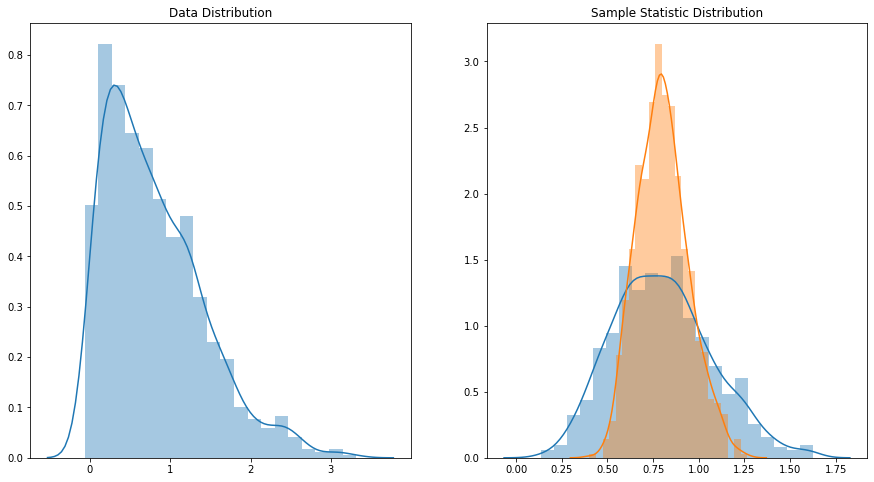

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(15,8))
sns.distplot(r, ax=axes[0])
sns.distplot(sample_5, ax=axes[1])
sns.distplot(sample_20, ax=axes[1])
axes[0].set_title('Data Distribution')
axes[1].set_title('Sample Statistic Distribution')

## Central Limit Theorem

The central limit theorem states that means drawn from multiple samples will resemble the familiar bell-shaped normal curve even if the source population is not normally distributed. The central limit theorem allows for normal approximation formulas to be used in calculating sampling distributions for inference e.g. confidence intervals and hypothesis tests.

## Standard Error

This is a single metric that sums up the variability in the sampling distribution for a statistic. The standard error can be estimated using a statistic based on the standard deviation $s$ of the sample values and the sample size $n$:

\begin{equation}
Standard Error = SE = \frac{s}{\sqrt{n}}
\end{equation}

As the sample size increases, the standard error decreases (shown above). The relationship between standard error and sample size is sometimes referred to as the square-root of n rule: in order to reduce the standard error by a factor of 2, the sample size must be increased by a factor of 4. The validity of the standard error formula arises from the central limit theorem. Consider the following approach to measure standard error:
1. Collect a number of brand new samples from the population.
2. For each new sample, calculate the statistic (e.g., mean).
3. Calculate the standard deviation of the statistics computed in step 2; use this as your estimate of standard error.

In practice, this approach of collecting new samples to estimate the standard error is typically not feasible. Fortunately, it turns out that it is not necessary to draw brand new samples; instead, you can use bootstrap resamples which has become the standard way of measuring the standard error.

**Do not confuse standard deviation (which measures the variability of individual data points) with standard error (which measures the variability of a sample metric).**

### Key Takeaways

- The frequency distribution of a sample statistic tells us how that metric would turn out differently from sample to sample.
- This sampling distribution can be estimated via the bootstrap, or via formulas that rely on the central limit theorem.
- A key metric that sums up the variability of a sample statistic is its standard error.

## The Bootstrap

One easy and effective way to estimate the sampling distribution of a statistic, or of model parameters, is to draw additional samples, with replacement, from the sample itself and recalculate the statistic or model for each resample. This procedure is called the bootstrap, and it does not necessarily involve any assumptions about the data or the sample statistic being normally distributed.

- **Bootstrap sample**: A sample taken with replacement from an observed data set.
- **Resampling**: The process of taking repeated samples from observed data; includes both bootstrap and permutation (shuffling) procedures.

Conceptually, you can imagine the bootstrap as replicating the original sample thousands or millions of times so that you have a hypothetical population that embodies all the knowledge from your original sample (it’s just larger). You can then draw samples from this hypothetical population for the purpose of estimating a sampling distribution.

In practice, it is not necessary to actually replicate the sample a huge number of times. We simply replace each observation after each draw; that is, we sample with replacement. In this way we effectively create an infinite population in which the probability of an element being drawn remains unchanged from draw to draw. The algorithm for a bootstrap resampling of the mean is as follows, for a sample of size n:
1. Draw a sample value, record, replace it.
2. Repeat $n$ times.
3. Record the mean of the n resampled values.
4. Repeat steps 1–3 $R$ times.
5. Use the $R$ results to:
    - a. Calculate their standard deviation (this estimates sample mean standard error).
    - b. Produce a histogram or boxplot.
    - c. Find a confidence interval.
    
$R$, the number of iterations of the bootstrap, is set somewhat arbitrarily. The more iterations you do, the more accurate the estimate of the standard error, or the confidence interval. The result from this procedure is a bootstrap set of sample statistics or estimated model parameters, which you can then examine to see how variable they are.

**The bootstrap does not compensate for a small sample size; it does not create new data, nor does it fill in holes in an existing data set. It merely informs us about how lots of additional samples would behave when drawn from a population like our original sample.**

### Resampling Versus Bootstrapping

Sometimes the term resampling is used synonymously with the term bootstrapping, as just outlined. More often, the term resampling also includes permutation procedures, where multiple samples are combined and the sampling may be done without replacement. In any case, the term bootstrap always implies sampling with replacement from an observed data set.

- The bootstrap (sampling with replacement from a data set) is a powerful tool for assessing the variability of a sample statistic.
- The bootstrap can be applied in similar fashion in a wide variety of circumstances, without extensive study of mathematical approximations to sampling distributions.
- It also allows us to estimate sampling distributions for statistics where no mathematical approximation has been developed.
- When applied to predictive models, aggregating multiple bootstrap sample predictions (bagging) outperforms the use of a single model.

## Confidence Intervals

- **Confidence level**: The percentage of confidence intervals, constructed in the same way from the same population, expected to contain the statistic of interest.
- **Interval endpoints**: The top and bottom of the confidence interval.

Confidence intervals is a way to understand the potential error in a sample estimate.

Analysts and managers, while acknowledging uncertainty, nonetheless place undue faith in an estimate when it is presented as a single number (a point estimate). Presenting an estimate not as a single number but as a range is one way to counteract this tendency. Confidence intervals do this in a manner grounded in statistical sampling principles.

Confidence intervals always come with a coverage level, expressed as a (high) percentage, say 90% or 95%. One way to think of a 90% confidence interval is as follows: it is the interval that encloses the central 90% of the bootstrap sampling distribution of a sample statistic. More generally, an x% confidence interval around a sample estimate should, on average, contain similar sample estimates x% of the time (when a similar sampling procedure is followed).

Given a sample of size n, and a sample statistic of interest, the algorithm for a bootstrap confidence interval is as follows:
1. Draw a random sample of size n with replacement from the data (a resample).
2. Record the statistic of interest for the resample.
3. Repeat steps 1–2 many (R) times.
4. For an x% confidence interval, trim \[(100-x) / 2\]% of the R resample results from either end of the distribution.
5. The trim points are the endpoints of an x% bootstrap confidence interval.

Example is calculation is below: 

In [3]:
# Generate a random dataset. In this instance its a salary dataset ranging from 10,000 to 150,000 with 20,000 data points
salaries = np.random.randint(10_000, 150_000, 20_000)

In [4]:
salaries

array([ 25675,  53577,  82753, ...,  11077, 131417,  23591])

In [5]:
# Generate bootstap sample of 2,000 datapoints 1,000 times and take the mean of each sample:
means = []
for _ in range(1000):
    means.append(np.mean(np.random.choice(salaries, size=2_000)))

In [7]:
means[:10]

[81047.829,
 80390.851,
 80438.9985,
 79105.666,
 80290.223,
 80474.422,
 79741.248,
 81069.888,
 79608.0405,
 80544.486]

In [18]:
len(means)

1000

In [23]:
# Calculate the 95% confidence interal of the sample statistic which in this case is the mean of salaries
# (100 - 95) / 2 = 2.5
print(f'Lower Bound (2.5%): {np.percentile(means, 2.5)}')
print(f'Upper Bound (97.5%): {np.percentile(means, 97.5)}')
print(f'Sample Mean: {np.mean(means):.2f}')

Lower Bound (2.5%): 77830.1313875
Upper Bound (97.5%): 81369.32096249999
Sample Mean: 79612.20


The confidence interval for the mean salaray at a sample size of 2,000 drawn 1,000 times is £77,830 - £81,369 with a mean of £79,612

Text(81369.32096249999, 0.0004, 'Upper Bound (97.5%):\n£81369.32')

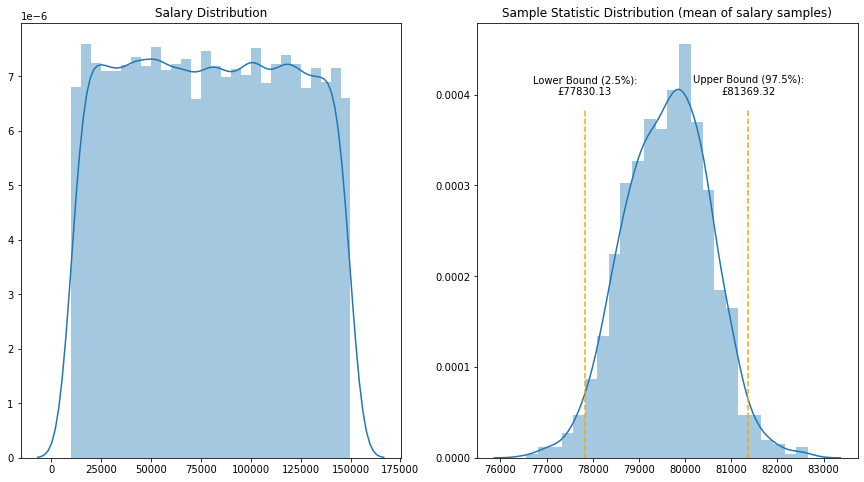

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(15,8))
sns.distplot(salaries, ax=axes[0])
axes[0].set_title('Salary Distribution')
sns.distplot(means, ax=axes[1])
axes[1].set_title('Sample Statistic Distribution (mean of salary samples)')
axes[1].axvline(np.percentile(means, 2.5), linestyle='--', color='orange', ymax=0.80)
axes[1].axvline(np.percentile(means, 97.5), linestyle='--', color='orange', ymax=0.80)
axes[1].text(np.percentile(means, 2.5), 0.0004, f'Lower Bound (2.5%):\n£{np.percentile(means, 2.5):.2f}', horizontalalignment='center')
axes[1].text(np.percentile(means, 97.5), 0.0004, f'Upper Bound (97.5%):\n£{np.percentile(means, 97.5):.2f}', horizontalalignment='center')

The bootstrap is a general tool that can be used to generate confidence intervals for most statistics, or model parameters. The percentage associated with the confidence interval is termed the _level of confidence_. The higher the level of confidence, the wider the interval. Also, the smaller the sample, the wider the interval (i.e., the more uncertainty). Both make sense: the more confident you want to be, and the less data you have, the wider you must make the confidence interval to be sufficiently assured of capturing the true value.

**Confidence intervals are used to get an idea of how variable a sample result might be. This should be used to determine if the potential error in an estimate and if need be, learn whether a larger sample size is needed**

### Key Takeaways

- Confidence intervals are the typical way to present estimates as an interval range.
- The more data you have, the less variable a sample estimate will be.
- The lower the level of confidence you can tolerate, the narrower the confidence interval will be.
- The bootstrap is an effective way to construct confidence intervals.

## Normal Distribution

- **Error**: The difference between a data point and a predicted or average value.
- **Standardize**: Subtract the mean and divide by the standard deviation.
- **z-score**: The result of standardizing an individual data point.
- **Standard normal**: A normal distribution with mean = 0 and standard deviation = 1.
- **QQ-Plot**: A plot to visualize how close a sample distribution is to a normal distribution.

In a normal distribution 68% of the data lies within one standard deviation of the mean and 95% lies within two standard deviations

Text(0, 0.55, '95% within two standard deviations')

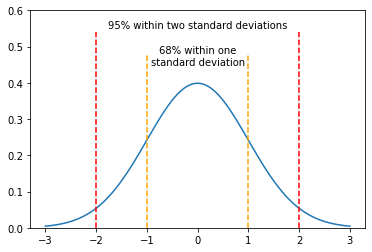

In [23]:
mu = 0
variance = 1
sigma = np.math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
g = sns.lineplot(x, stats.norm.pdf(x, mu, sigma))
g.set_ylim([0.0, 0.6])

g.axvline(mu + sigma, linestyle='--', color='orange', ymax=0.80)
g.axvline(mu - sigma, linestyle='--', color='orange', ymax=0.80)
g.text(mu, 0.45, f'68% within one\nstandard deviation', horizontalalignment='center')

g.axvline(mu + sigma * 2, linestyle='--', color='red', ymax=0.90)
g.axvline(mu - sigma * 2, linestyle='--', color='red', ymax=0.90)
g.text(mu, 0.55, f'95% within two standard deviations', horizontalalignment='center')

### Standard Normal QQ-Plots

A standard normal distribution is one in which the units on the x-axis are expressed in terms of standard deviations away from the mean. To compare data to a standard normal distribution, you subtract the mean then divide by the standard deviation; this is also called normalization or standardization. The transformed value is termed a z-score, and the normal distribution is sometimes called the z-distribution.

A QQ-Plot is used to visually determine how close a sample is to the normal distribution. The QQ-Plot orders the z-scores from low to high, and plots each value's z-score on the y-axis; the x-axis is the corresponding quantile of a normal distribution for that value’s rank. Since the data is normalized, the units correspond to the number of standard deviations away of the data from the mean. If the points roughly fall on the diagonal line, then the sample distribution can be considered close to normal. Figure 2-11 shows a QQ-Plot for a sample of 100 values randomly generated from a normal distribution; as expected, the points closely follow the line.

((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

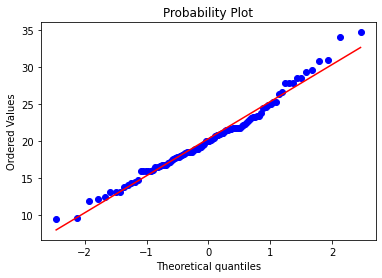

In [25]:
measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(measurements, dist="norm", plot=plt)

**Converting data to z-scores (i.e., standardizing or normalizing the data) does not make the data normally distributed. It just puts the data on the same scale as the standard normal distribution, often for comparison purposes.**

### Key Takeaways
- The normal distribution was essential to the historical development of statistics, as it permitted mathematical approximation of uncertainty and variability.
- While raw data is typically not normally distributed, errors often are, as are averages and totals in large samples.
- To convert data to z-scores, you subtract the mean of the data and divide by the standard deviation; you can then compare the data to a normal distribution.

## Long-Tailed Distributions

- **Tail**: The long narrow portion of a frequency distribution, where relatively extreme values occur at low frequency.
- **Skew**: Where one tail of a distribution is longer than the other.

While the normal distribution is often appropriate and useful with respect to the distribution of errors and sample statistics, it typically does not characterize the distribution of raw data. Sometimes, the distribution is highly skewed (asymmetric), such as with income data, or the distribution can be discrete, as with binomial data. Both symmetric and asymmetric distributions may have long tails. The tails of a distribution correspond to the extreme values (small and large). Nassim Taleb has proposed the black swan theory, which predicts that anamolous events, such as a stock market crash, are much more likely to occur than would be predicted by the normal distribution.

If this data was plotted on a qq-plot and the data points are far below the line for low values and far above the line for high values this means that we are much more likely to observe extreme values than would be expected if the data has a normal distribution.

## Student's t-Distribution

The t-distribution is a normally shaped distribution, but a bit thicker and longer on the tails. It is used extensively in depicting distributions of sample statistics. Distributions of sample means are typically shaped like a t-distribution, and there is a family of t-distributions that differ depending on how large the sample is. The larger the sample, the more normally shaped the t-distribution becomes.

- **n**: Sample size
- **Degrees of freedom**: A parameter that allows the t-distribution to adjust to different sample sizes, statistics, and number of groups

The t-distribution’s accuracy in depicting the behavior of a sample statistic requires that the distribution of that statistic for that sample be shaped like a normal distribution. It turns out that sample statistics are often normally distributed, even when the underlying population data is not (a fact which led to widespread application of the t-distribution). This phenomenon is termed the central limit theorem (see “Central Limit Theorem”).

### Key Takeaways

- The t-distribution is actually a family of distributions resembling the normal distribution, but with thicker tails.
- It is widely used as a reference basis for the distribution of sample means, differerences between two sample means, regression parameters, and more.

## Binomial Distribution

- **Trial**: An event with a discrete outcome (e.g., a coin flip).
- **Success**: The outcome of interest for a trial.
    - _Synonyms_: “1” (as opposed to “0”)
- **Binomial**: Having two outcomes.
    - _Synonyms_: yes/no, 0/1, binary
- **Binomial trial**: A trial with two outcomes
    - _Synonym_: Bernoulli trial 
- **Binomial distribution**: Distribution of number of successes in x trials.
    - _Synonym_: Bernoulli distribution
    
Yes/no (binomial) outcomes lie at the heart of analytics since they are often the culmination of a decision or other process; buy/don’t buy, click/don’t click, survive/die, and so on. Central to understanding the binomial distribution is the idea of a set of trials, each trial having two possible outcomes with definite probabilities.

For example, flipping a coin 10 times is a binomial experiment with 10 trials, each trial having two possible outcomes (heads or tails). Such yes/no or 0/1 outcomes are termed binary outcomes, and they need not have 50/50 probabilities. Any probabilities that sum to 1.0 are possible. Use of the term success does not imply that the outcome is desirable or beneficial, but it does tend to indicate the outcome of interest.

The binomial distribution is the frequency distribution of the number of successes ($x$) in a given number of trials ($n$) with specified probability ($p$) of success in each trial. There is a family of binomial distributions, depending on the values of $x$, $n$, and $p$. 

In [42]:
# 5 trials
# prob of success 0.1
# test repeated 1000 times
# np.random.binomial(5, 0.1, 1000) -> returns an array of shape (,1000) stating the number of successes in each trial
np.sum(np.random.binomial(5, 0.1, 1000) == 2) / 1000

0.073

Probability of getting **exactly** two successes is around 0.73%. The probability of getting **2 or fewer** success can be determined as:

In [43]:
np.sum(np.random.binomial(5, 0.1, 1000) <= 2) / 1000

0.99

It's not around 1% for getting 2 or few successes.

The mean of a binomial distribution is $n \times p$; you can also think of this as the expected number of successes in n trials, for success probability = $p$

The variance is $n \times p(1-p)$. With a large enough number of trials (particularly when p is close to 0.50), the binomial distribution is virtually indistinguishable from the normal distribution. In fact, calculating binomial probabilities with large sample sizes is computationally demanding, and most statistical procedures use the normal distribution, with mean and variance, as an approximation.

### Key Takeaways

- Binomial outcomes are important to model, since they represent, among other things, fundamental decisions (buy or don’t buy, click or don’t click, survive or die, etc.).
- A binomial trial is an experiment with two possible outcomes: one with probability p and the other with probability 1 – p.
- With large n, and provided p is not too close to 0 or 1, the binomial distribution can be approximated by the normal distribution.

## Poisson and Related Distributions

Many processes produce events randomly at a given overall rate—visitors arriving at a website, cars arriving at a toll plaza (events spread over time), imperfections in a square meter of fabric, or typos per 100 lines of code (events spread over space).

- **Lambda**: The rate (per unit of time or space) at which events occur.
- **Poisson distribution**: The frequency distribution of the number of events in sampled units of time or space.
- **Exponential distribution**: The frequency distribution of the time or distance from one event to the next event.
- **Weibull distribution**: A generalized version of the exponential, in which the event rate is allowed to shift over time.

### Poisson Distributions

From prior data we can estimate the average number of events per unit of time or space, but we might also want to know how different this might be from one unit of time/space to another. The Poisson distribution tells us the distribution of events per unit of time or space when we sample many such units. It is useful when addressing queuing questions like “How much capacity do we need to be 95% sure of fully processing the internet traffic that arrives on a server in any 5-second period?”

The key parameter in a Poisson distribution is lambda, or $\lambda$. This is the mean number of events that occurs in a specified interval of time or space. The variance for a Poisson distribution is also $\lambda$.

A common technique is to generate random numbers from a Poisson distribution as part of a queuing simulation:

In [44]:
# lamda = 5
# drawn 10000 samples from the poisson dist.
s = np.random.poisson(5, 10000)
s

array([ 6,  2, 11, ...,  5,  4,  3])

<AxesSubplot:>

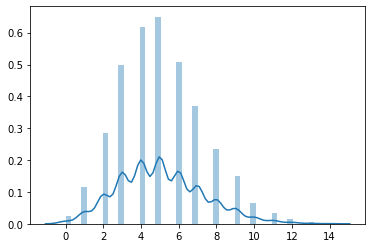

In [45]:
sns.distplot(s)

In [46]:
np.mean(s)

5.0422

The example above shows the averate queing time is 5 minutes and was simulated 10,000 times. 

### Exponential Distribution

Using the same parameter $\lambda$ that we used in the Poisson distribution, we can also model the distribution of the time between events: time between visits to a website or between cars arriving at a toll plaza. It is also used in engineering to model time to failure, and in process management to model, for example, the time required per service call

In [48]:
# 0.2 is the number of events per period
# generate 100 random numbers from the exponential distribution
s = np.random.exponential(0.2, 100)
s

array([0.0111825 , 0.47592769, 0.28906855, 0.12351161, 0.61321434,
       0.041167  , 0.25825771, 0.68972377, 0.14590601, 0.23906532,
       0.24404904, 0.5739253 , 0.35658046, 0.07780885, 0.06081663,
       0.29663869, 0.02927633, 0.20868088, 0.0391245 , 0.05807121,
       0.35216066, 0.00523009, 0.10735678, 0.27539483, 0.11407411,
       0.0110912 , 0.06258822, 0.20919891, 0.12485281, 0.14629937,
       0.10875816, 0.71712087, 0.19293218, 0.05024292, 0.00486291,
       0.30536234, 0.26497942, 0.0031203 , 0.93179674, 0.05421421,
       0.01822314, 0.12846661, 0.01914624, 0.23275054, 0.00201472,
       0.19730934, 0.39001429, 0.34246706, 0.08883582, 0.05814873,
       0.03617772, 0.04698594, 0.1061254 , 0.1403673 , 0.1258529 ,
       0.00613005, 0.20807819, 0.31619011, 0.1776222 , 0.56726102,
       0.01960854, 0.30822042, 0.03603935, 0.31838585, 0.04539836,
       0.72954243, 0.30377337, 0.58448553, 0.21141267, 0.02316083,
       0.22741131, 0.16332206, 0.52881253, 0.08965284, 0.47627

<AxesSubplot:>

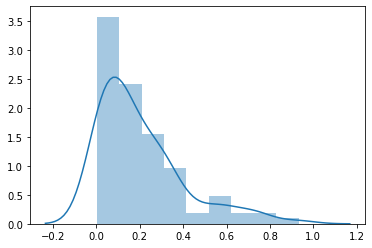

In [50]:
sns.distplot(s)

In [49]:
np.mean(s)

0.20274304840886578

A key assumption in any simulation study for either the Poisson or exponential distribution is that the rate, $\lambda$, remains constant over the period being considered. This is rarely reasonable in a global sense; for example, traffic on roads or data networks varies by time of day and day of week. However, the time periods, or areas of space, can usually be divided into segments that are sufficiently homogeneous so that analysis or simulation within those periods is valid.

### Estimating the Failure Rate

In many applications, the event rate, $\lambda$, is known or can be estimated from prior data. However, for rare events, this is not necessarily so. Aircraft engine failure, for example, is sufficiently rare that, for a given engine type, there may be little data on which to base an estimate of time between failures. With no data at all, there is little basis on which to estimate an event rate. However, you can make some guesses: if no events have been seen after 20 hours, you can be pretty sure that the rate is not 1 per hour. Via simulation, or direct calculation of probabilities, you can assess different hypothetical event rates and estimate threshold values below which the rate is very unlikely to fall. If there is some data but not enough to provide a precise, reliable estimate of the rate, a goodness-of-fit test (e.g. "Chi-Square Test") can be applied to various rates to determine how well they fit the observed data.

### Weibull Distribution

In many cases, the event rate does not remain constant over time. If the period
over which it changes is much longer than the typical interval between events,
there is no problem; you just subdivide the analysis into the segments where
rates are relatively constant, as mentioned before. If, however, the event rate
changes over the time of the interval, the exponential (or Poisson) distributions
are no longer useful. This is likely to be the case in mechanical failure—the risk
of failure increases as time goes by. The Weibull distribution is an extension of
the exponential distribution, in which the event rate is allowed to change, as
specified by a shape parameter, $\beta$ . If $\beta$ > 1, the probability of an event increases
over time, if $\beta$ < 1, it decreases. Because the Weibull distribution is used with
time-to-failure analysis instead of event rate, the second parameter is expressed
in terms of characteristic life, rather than in terms of the rate of events per
interval. The symbol used is $\eta$, the Greek letter eta. It is also called the scale
parameter.

With the Weibull, the estimation task now includes estimation of both
parameters, $\beta$ and  $\eta$. Software is used to model the data and yield an estimate of
the best-fitting Weibull distribution.

<AxesSubplot:>

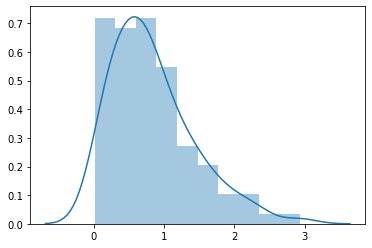

In [60]:
# Beta = 1.5
# Draw 100 random numbers
# Beta > 1, prob of event increases over time
s = np.random.weibull(1.5, 100)
sns.distplot(s)

<AxesSubplot:>

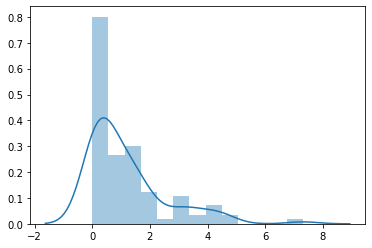

In [61]:
# Beta < 1, prob of event decreases over time
s = np.random.weibull(0.75, 100)
sns.distplot(s)

### Key Takeaways

- For events that occur at a constant rate, the number of events per unit of time or space can be modeled as a Poisson distribution.
- In this scenario, you can also model the time or distance between one event and the next as an exponential distribution.
- A changing event rate over time (e.g., an increasing probability of device failure) can be modeled with the Weibull distribution.